In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


In [4]:
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Rescaling,Input,Dense,Conv2D,MaxPool2D,Dropout,Flatten


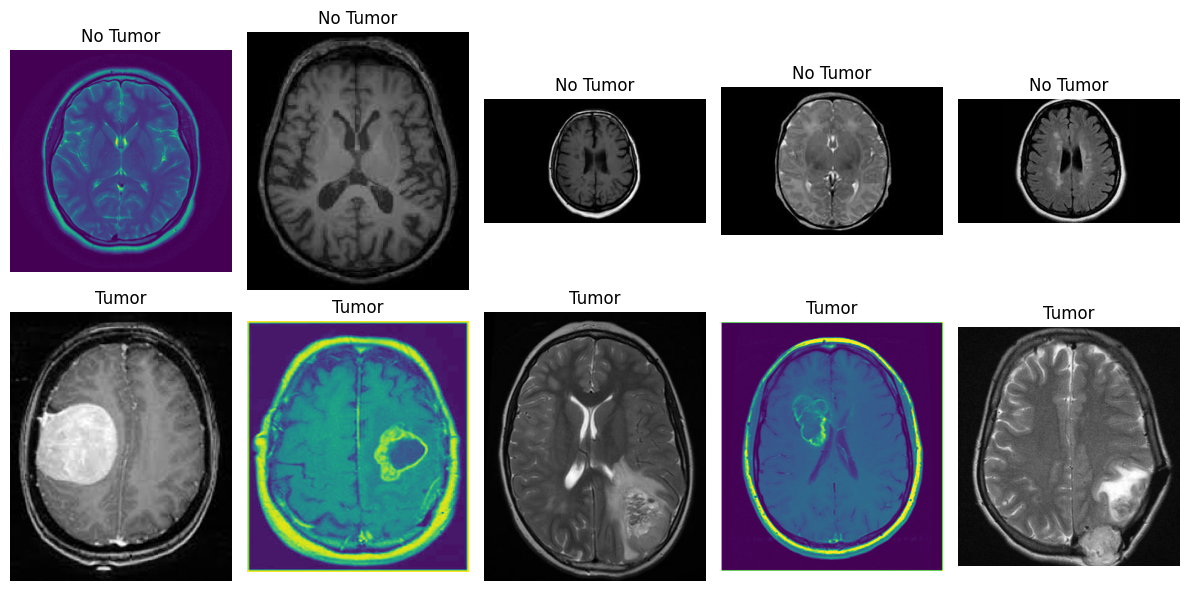

In [19]:
no_tumor_dir = "oy tomur/no"
yes_tumor_dir = "oy tomur/yes"

import matplotlib.pyplot as plt
import os

no_tumor_files = os.listdir(no_tumor_dir)[:5]
yes_tumor_files = os.listdir(yes_tumor_dir)[:5]

fig, axs = plt.subplots(2, 5, figsize=(12, 6))


for i, filename in enumerate(no_tumor_files):
    img_path = os.path.join(no_tumor_dir, filename)
    img = plt.imread(img_path)
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title('No Tumor')


for i, filename in enumerate(yes_tumor_files):
    img_path = os.path.join(yes_tumor_dir, filename)
    img = plt.imread(img_path)
    axs[1, i].imshow(img)
    axs[1, i].axis('off')
    axs[1, i].set_title('Tumor')

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import os
import cv2

def normalize(image):
    for filename in os.listdir(image):
        img_path = os.path.join(image, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        img = img.astype(np.float32) / 255.0  
        cv2.imwrite(img_path, img) 
normalize('oy tomur/brain_tumor_dataset/no')
normalize('oy tomur/brain_tumor_dataset/yes')

In [8]:
def load_images(image_folder):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128)) 
        img = img.astype(np.float32) / 255.0 
        images.append(img)
        labels.append(0 if 'no_tumor' in img_path else 1)
    return np.array(images), np.array(labels)


In [9]:
X_no_tumor, y_no_tumor = load_images(no_tumor_dir)

In [10]:
X_yes_tumor, y_yes_tumor = load_images(yes_tumor_dir)

In [11]:
X_train = np.concatenate((X_no_tumor, X_yes_tumor), axis=0)
y_train = np.concatenate((y_no_tumor, y_yes_tumor), axis=0)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
cnn = tf.keras.models.Sequential()

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                activation='relu', input_shape=(128, 128, 1)))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

C:\Users\pc\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train,epochs=100,batch_size=32,validation_split=0.2)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.6170 - loss: 0.6924 - val_accuracy: 1.0000 - val_loss: 0.6902
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - accuracy: 1.0000 - loss: 0.6894 - val_accuracy: 1.0000 - val_loss: 0.6872
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 1.0000 - loss: 0.6865 - val_accuracy: 1.0000 - val_loss: 0.6842
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 1.0000 - loss: 0.6835 - val_accuracy: 1.0000 - val_loss: 0.6812
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 1.0000 - loss: 0.6805 - val_accuracy: 1.0000 - val_loss: 0.6783
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - accuracy: 1.0000 - loss: 0.6776 - val_accuracy: 1.0000 - val_loss: 0.6753
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 1.0000 - loss: 0.6746 - val_accuracy: 1.0000 - val_loss: 0.6724
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 1.0000 - loss: 0.6717 - val_accuracy: 1.0000 - v

In [17]:
import tensorflow as tf

In [18]:
import numpy as np